Optimize the size of the tree to make better predictions.

In [1]:
import pandas as pd
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor


# Path of the file to read
iowa_file_path = '../train.csv'

home_data = pd.read_csv(iowa_file_path)

y = home_data.SalePrice

features = ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']
X = home_data[features]

# Split into validation and training data
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

iowa_model = DecisionTreeRegressor()
iowa_model.fit(train_X, train_y)

# Make validation predictions and calculate mean absolute error
val_predictions = iowa_model.predict(val_X)
val_mae = mean_absolute_error(val_predictions, val_y)
print(f"Validation MAE: {val_mae}")


Validation MAE: 30154.80821917808


# Exercises

In [2]:
def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)

    preds_val = model.predict(val_X)
    
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

## Step 1: Compare Different Tree Sizes

In [3]:
candidate_max_leaf_nodes = [5, 25, 50, 100, 250, 500]

# least_mae=1e9
# ans=1
# for i in candidate_max_leaf_nodes:
#     curr_mae=get_mae(i,train_X,val_X,train_y,val_y)
#     if curr_mae<least_mae:
#         least_mae=curr_mae
#         ans=i

scores = {leaf_size: get_mae(leaf_size, train_X, val_X, train_y, val_y) for leaf_size in candidate_max_leaf_nodes}
print(scores)

# Store the best value of max_leaf_nodes
best_tree_size = min(scores, key=scores.get)
print(best_tree_size)

{5: 35044.51299744237, 25: 29016.41319191076, 50: 27405.930473214907, 100: 27282.50803885739, 250: 27893.822225701646, 500: 29454.18598068598}
100


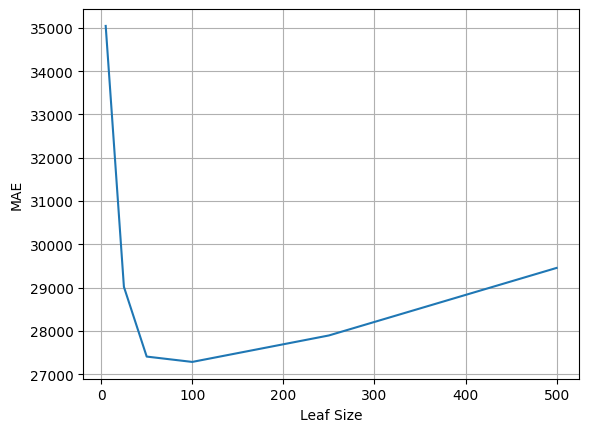

In [6]:
import matplotlib.pyplot as plt
plt.plot(scores.keys(),scores.values())
plt.xlabel("Leaf Size")
plt.ylabel("MAE")
plt.grid(True)
plt.show()

We can see that max_leaf_nodes=100 produces the least MAE

## Step 2: Fit Model Using All Data
With the best tree size

In [9]:
final_model = DecisionTreeRegressor(max_leaf_nodes=best_tree_size)
final_model.fit(X,y)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,100
,min_impurity_decrease,0.0
,ccp_alpha,0.0


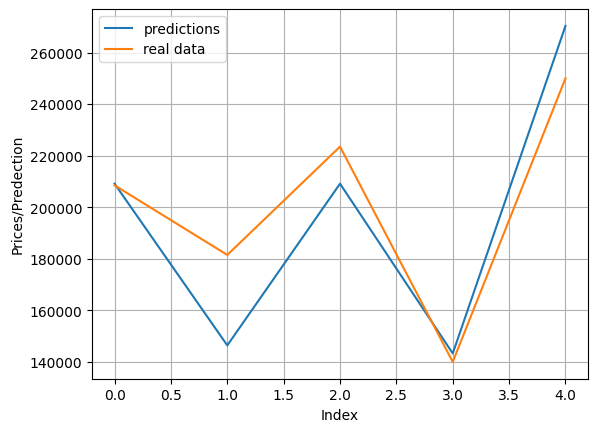

In [21]:
preds=final_model.predict(X)
plt.plot([i for i in range(5)],preds[:5],label="predictions")
plt.plot([i for i in range(5)],y.head(),label="real data")
plt.legend()

plt.xlabel("Index")
plt.ylabel("Prices/Predection")

plt.grid(True)
plt.show()